In [1]:
# Importing new libraries
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA # principal component analysis


# Importing known libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
final_exam = pd.read_excel('finalExam_Mobile_App_Survey_Data.xlsx')

final_exam.info()
# Remove demographic information
    
final_exam_reduced = final_exam.iloc[ : , 2:-11 ]

# Scaling without demographic
scaler = StandardScaler()

scaler.fit(final_exam_reduced)

X_scaled_reduced = scaler.transform(final_exam_reduced)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 88 columns):
caseID    1552 non-null int64
q1        1552 non-null int64
q2r1      1552 non-null int64
q2r2      1552 non-null int64
q2r3      1552 non-null int64
q2r4      1552 non-null int64
q2r5      1552 non-null int64
q2r6      1552 non-null int64
q2r7      1552 non-null int64
q2r8      1552 non-null int64
q2r9      1552 non-null int64
q2r10     1552 non-null int64
q4r1      1552 non-null int64
q4r2      1552 non-null int64
q4r3      1552 non-null int64
q4r4      1552 non-null int64
q4r5      1552 non-null int64
q4r6      1552 non-null int64
q4r7      1552 non-null int64
q4r8      1552 non-null int64
q4r9      1552 non-null int64
q4r10     1552 non-null int64
q4r11     1552 non-null int64
q11       1552 non-null int64
q12       1552 non-null int64
q13r1     1552 non-null int64
q13r2     1552 non-null int64
q13r3     1552 non-null int64
q13r4     1552 non-null int64
q13r5     1552 non-null

/anaconda3/envs/machine/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/machine/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


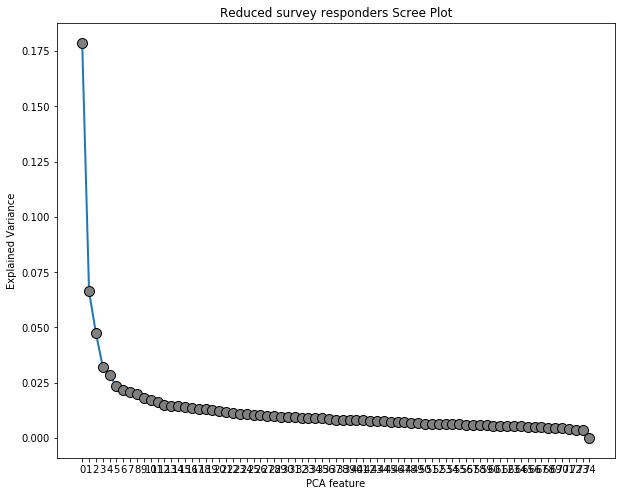

In [3]:
# Run PCA without limiting the number of components
final_exam_pca = PCA(n_components = None,
                           random_state = 508)


final_exam_pca.fit(X_scaled_reduced)


X_pca_reduced = final_exam_pca.transform(X_scaled_reduced)



fig, ax = plt.subplots(figsize=(10, 8))

features = range(final_exam_pca.n_components_)


plt.plot(features,
         final_exam_pca.explained_variance_ratio_,
         linewidth = 2,
         marker = 'o',
         markersize = 10,
         markeredgecolor = 'black',
         markerfacecolor = 'grey')


plt.title('Reduced survey responders Scree Plot')
plt.xlabel('PCA feature')
plt.ylabel('Explained Variance')
plt.xticks(features)
plt.show()

### BASED ON THE SCREE PLOT, I DECIDED TO USE ONLY 4 PRINCIPAL COMPONENTS ###

In [4]:
# Run PCA again based on the desired number of components

X_pca_reduced_optimal = PCA(n_components = 4,
                           random_state = 508)

X_pca_reduced_optimal.fit(X_scaled_reduced)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=508,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
# Analyze factor loadings to understand principal components

factor_loadings_df = pd.DataFrame(pd.np.transpose(X_pca_reduced_optimal.components_))

factor_loadings_df = factor_loadings_df.set_index(final_exam_reduced.columns.values)

print(factor_loadings_df)

factor_loadings_df.to_excel('FINAL_SURVEY_FACTOR_LOADINGS.xlsx')

                   0             1             2             3
q2r1   -3.243074e-02 -5.943262e-02 -1.782408e-01  2.272410e-01
q2r2   -6.347649e-02  6.279788e-02 -1.349289e-01  8.568289e-02
q2r3   -1.991901e-02  1.896769e-02  2.432884e-02 -1.966356e-01
q2r4   -4.043711e-02  1.172187e-01 -2.064375e-02 -5.808885e-05
q2r5   -4.689819e-02  1.276232e-01 -4.631148e-02  6.301300e-02
q2r6   -3.556443e-02  1.390811e-01 -4.665797e-02  6.053772e-02
q2r7   -3.974460e-02  1.084867e-01 -7.978067e-02  4.830487e-02
q2r8   -6.275487e-02  1.898432e-02 -2.088274e-01  1.292401e-01
q2r9    1.244518e-02  2.904223e-03  5.380459e-02 -1.294694e-02
q2r10   2.285326e-25 -3.591888e-22 -5.307560e-21  4.611403e-20
q4r1   -4.994651e-02 -7.503257e-02 -2.199230e-01  5.565830e-02
q4r2   -1.057533e-01  1.195477e-01 -1.729552e-01  4.371974e-02
q4r3   -9.577541e-02  3.149069e-02 -1.878929e-01 -3.474700e-02
q4r4   -1.070028e-01  1.178799e-01 -1.680435e-01  2.242648e-02
q4r5   -6.138730e-02 -5.477563e-02 -1.356610e-01 -1.531

In [6]:
# Analyze factor strengths per customer

X_pca_reduced_optimal = X_pca_reduced_optimal.transform(X_scaled_reduced)

X_pca_df = pd.DataFrame(X_pca_reduced_optimal)

In [7]:
# Rename my principal components and reattach demographic information
X_pca_df.columns = ['Need_1', 'Need_2', 'Need_3','Need_4']

final_pca_df = pd.concat([final_exam.iloc[ : , 1:2], final_exam.iloc[ : , -11:] , X_pca_df], axis = 1)

# Analyze in more detail
age_categories  = {1 : 'under 18',
                 2 : '18-24',
                 3: '25-29',
                 4:'30-34',
                 5:'35-39',
                 6: '40-44',
                 7:'45-49',
                 8:'50-54',
                 9:'55-59',
                 10:'60-64',
                 11:'65 or over'}
final_pca_df['q1'].replace(age_categories, inplace = True)


final_pca_df['q1'].value_counts()


# Rename our Demographics
# Renaming question 48
highest_education_level = {1 : 'Some high school',
                2 : 'High school graduate',
                3 : 'Some college',
                4 : 'College graduate',
                5 : 'Some post-graduate studies',
                6 : 'Post graduate degree'}


final_pca_df['q48'].replace(highest_education_level, inplace = True)



#Renaming question 49
marital_status = {1 : 'Married',
                2 : 'Single',
                3 : 'Single with a partner',
                4 : 'Separated/Widowed/Divorced'}


final_pca_df['q48'].replace(marital_status, inplace = True)



#Renaming question 50 response option 1
children_none = {1 : 'no children'}

final_pca_df['q50r1'].replace(children_none, inplace = True)



#Renaming question 50 response option 2
children_under6 = {1 : 'Yes, children under 6 years old'}

final_pca_df['q50r2'].replace(children_under6, inplace = True)



#Renaming question 50 response option 3
children_6_12 = {1 : 'Yes, children 6-12 years old'}

final_pca_df['q50r3'].replace(children_6_12, inplace = True)



#Renaming question 50 response option 4
children_13_17 = {1 : 'Yes, children 13-17 years old'}

final_pca_df['q50r4'].replace(children_13_17, inplace = True)




# Renaming question 54
race = {1 : 'White or Caucasian',
                 2 : 'Black or African American',
                 3 : 'Asian',
                 4 : 'Native Hawaiian or Other Pacific Islander',
                 5 : 'American Indian or Alaska Native',
                 6 : 'Other race'}

final_pca_df['q54'].replace(race, inplace = True)


# Renaming question 55
ethnicity = {1 : 'Yes',
             2 : 'No'}

final_pca_df['q55'].replace(ethnicity, inplace = True)


# Renaming question 56
income = {1 : 'Under $10,000',
                 2 : '$10,000-$14,999',
                 3 : '$15,000-$19,999',
                 4 : '$20,000-$29,999',
                 5 : '$30,000-$39,999',
                 6 : '$40,000-$49,999',
                 7 : '$50,000-$59,999',
                 8 : '$60,000-$69,999',
                 9 : '$70,000-$79,999',
                 10 : '$80,000-$89,999',
                 11 : '$90,000-$99,999',
                 12 : '$100,000-$124,999',
                 13 : '$125,000-$149,999',
                 14 : '$150,000 and over'}

final_pca_df['q56'].replace(income, inplace = True)



# Renaming question 57
gender = {1 : 'Male',
          2 : 'Female'}

final_pca_df['q57'].replace(gender, inplace = True)

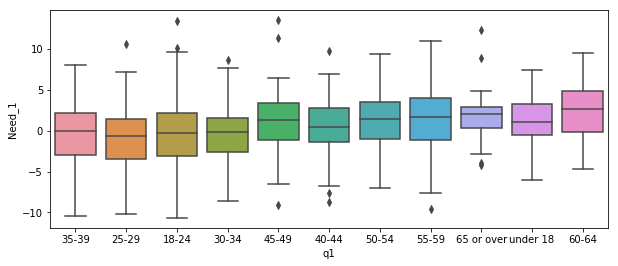

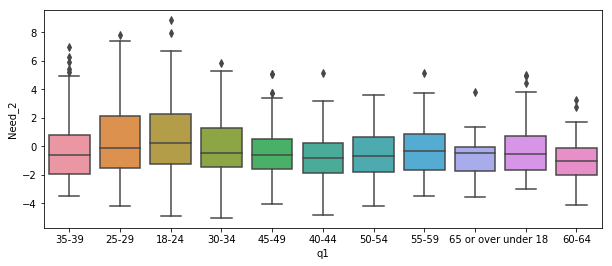

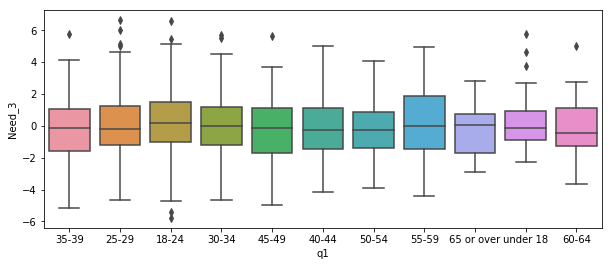

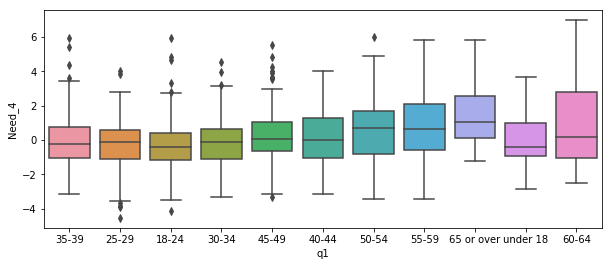

In [8]:
# ANALYZING EACH PRINCIPAL COMPONENT ACCORDING TO CATEGORICAL VARIABLES

# According to Age

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(x = 'q1',
            y =  'Need_1',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(x = 'q1',
            y =  'Need_2',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(x = 'q1',
            y =  'Need_3',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(x = 'q1',
            y =  'Need_4',
            data = final_pca_df)

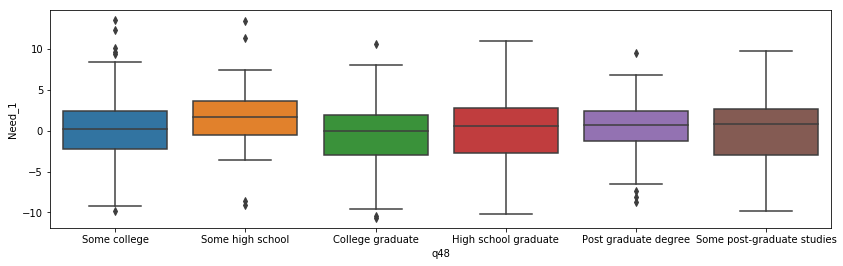

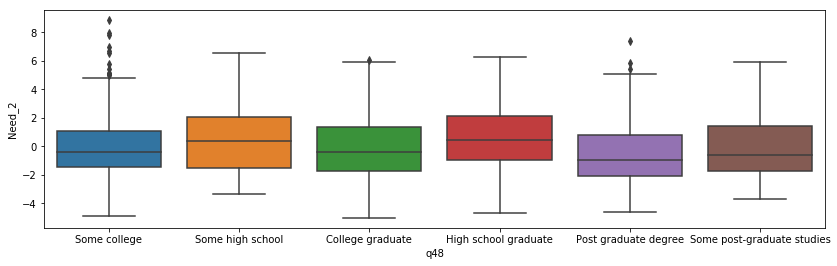

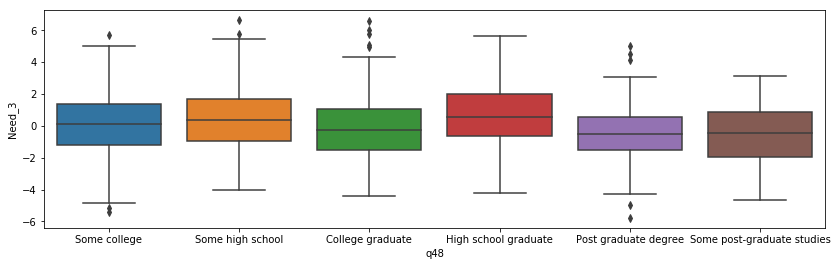

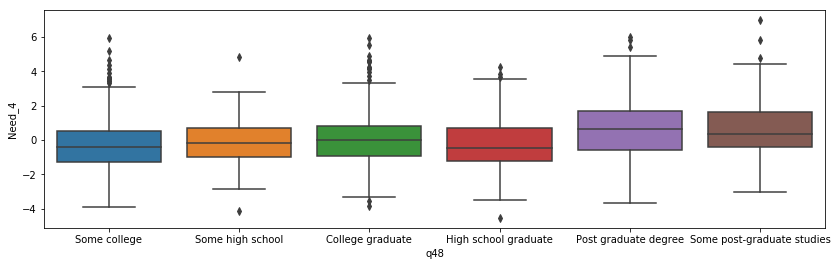

In [9]:
# According to Education

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q48',
            y =  'Need_1',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q48',
            y =  'Need_2',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q48',
            y =  'Need_3',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q48',
            y =  'Need_4',
            data = final_pca_df)

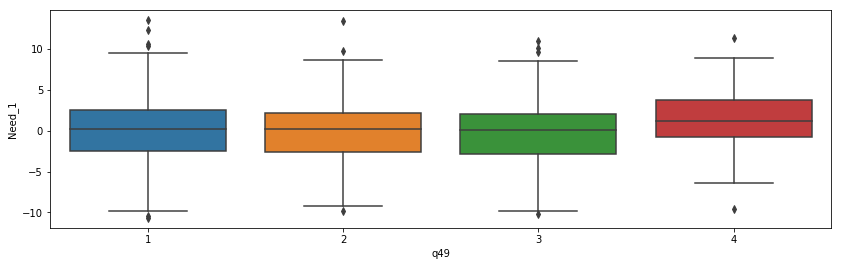

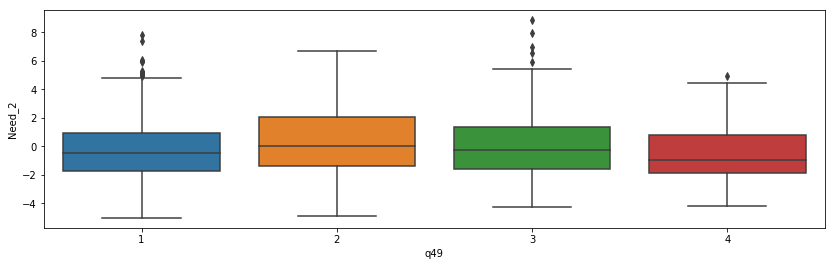

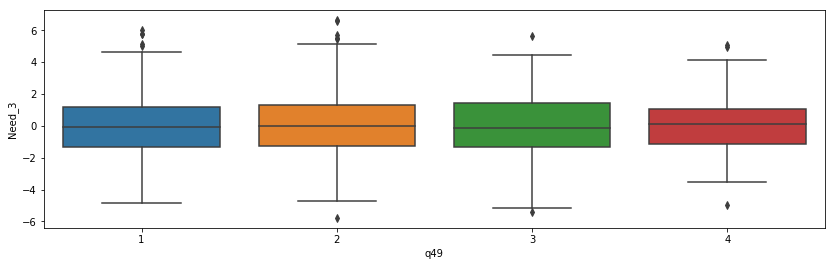

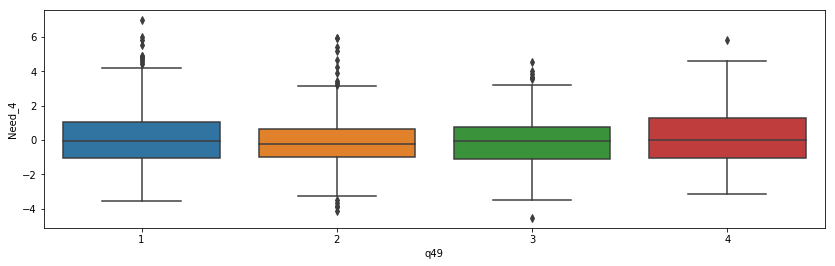

In [10]:
# According to Marital Status

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q49',
            y =  'Need_1',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q49',
            y =  'Need_2',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q49',
            y =  'Need_3',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q49',
            y =  'Need_4',
            data = final_pca_df)

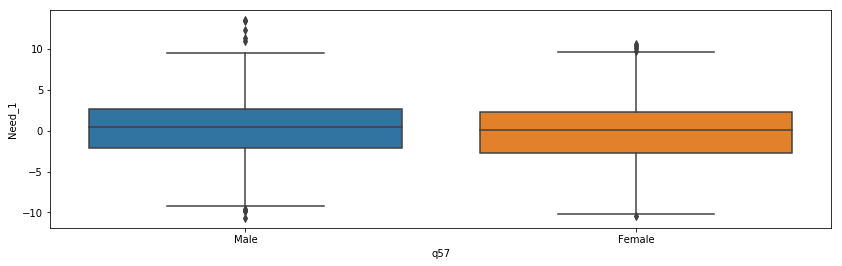

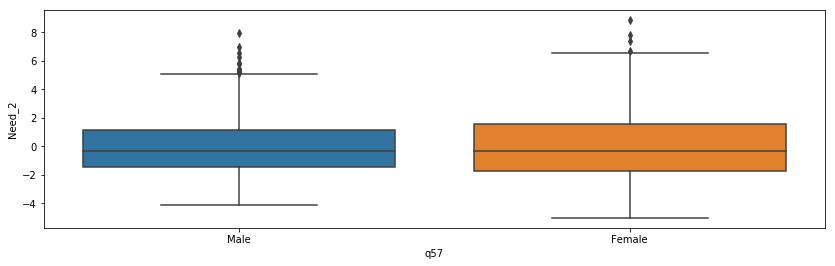

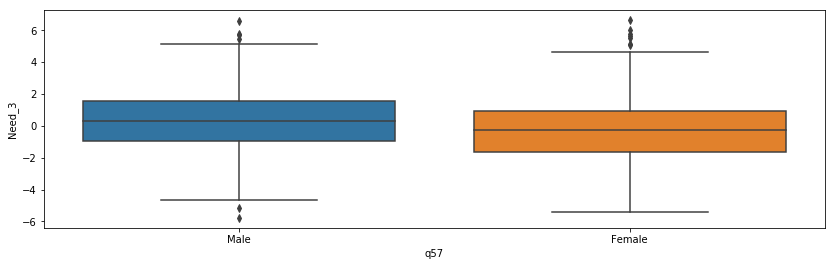

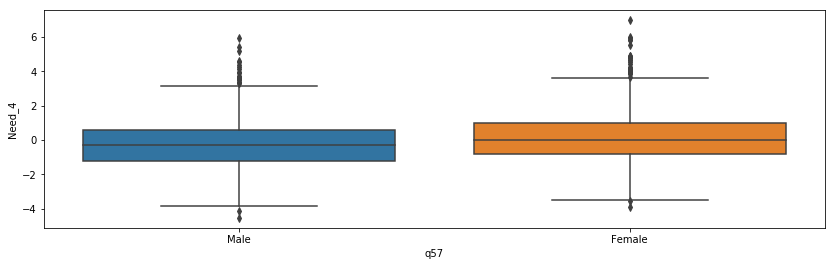

In [11]:
# According to Gender

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q57',
            y =  'Need_1',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q57',
            y =  'Need_2',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q57',
            y =  'Need_3',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x = 'q57',
            y =  'Need_4',
            data = final_pca_df)

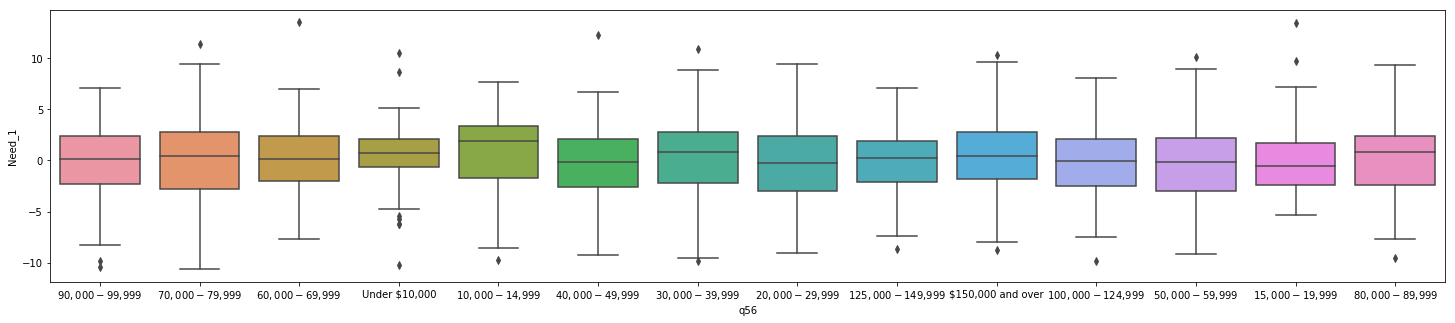

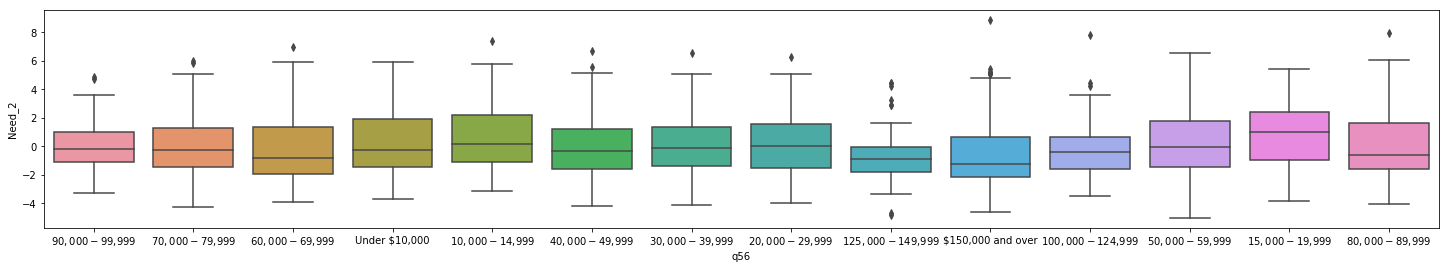

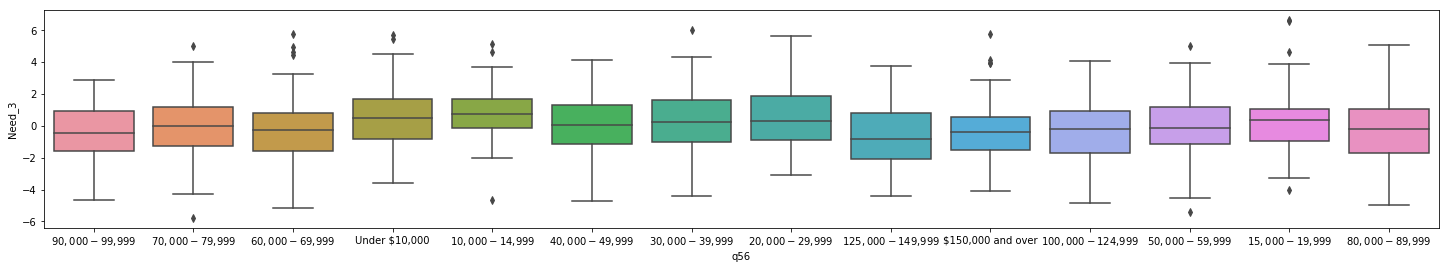

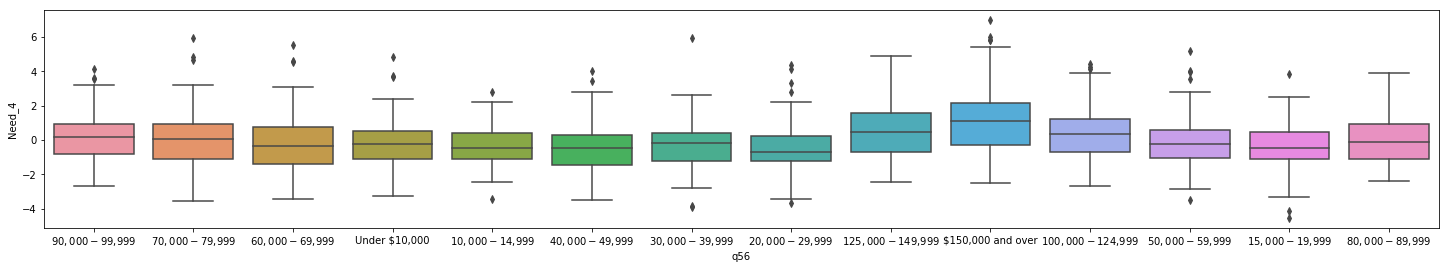

In [12]:
# According to Income

fig, ax = plt.subplots(figsize = (25, 5))
sns.boxplot(x = 'q56',
            y =  'Need_1',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (25, 4))
sns.boxplot(x = 'q56',
            y =  'Need_2',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (25, 4))
sns.boxplot(x = 'q56',
            y =  'Need_3',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (25, 4))
sns.boxplot(x = 'q56',
            y =  'Need_4',
            data = final_pca_df)

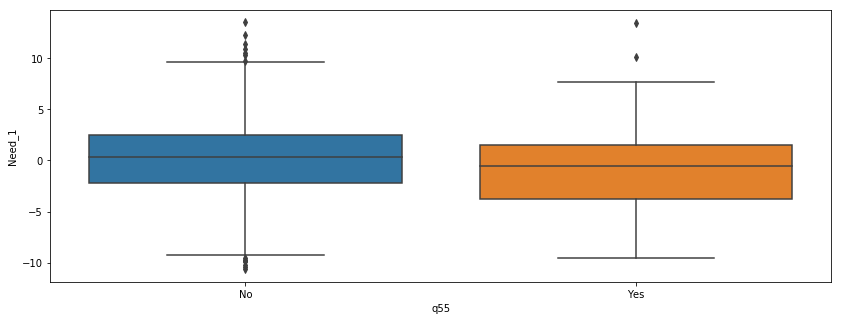

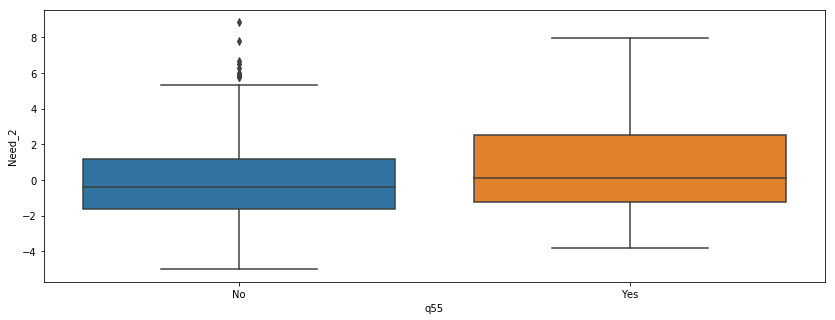

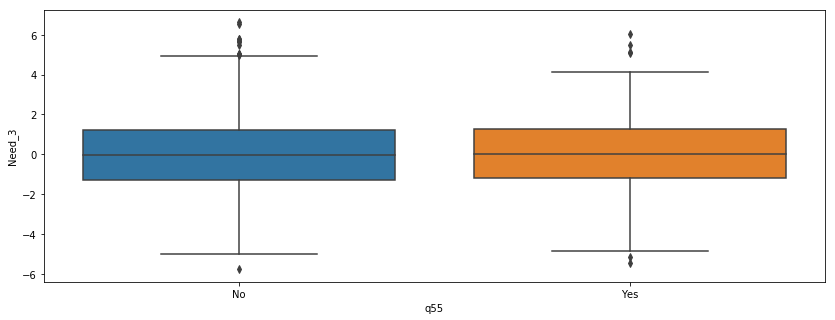

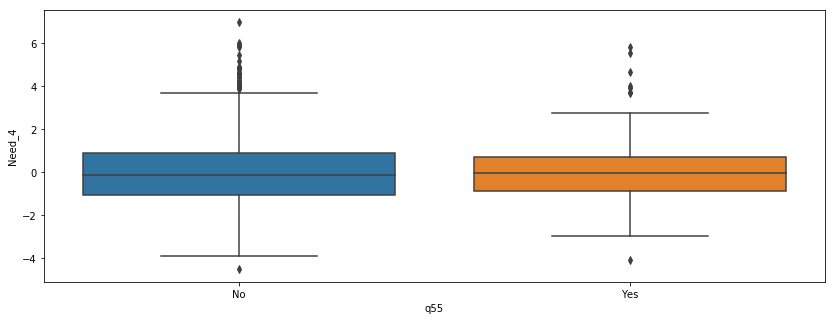

In [13]:
# According to Hispanic/Latino (binary)

fig, ax = plt.subplots(figsize = (14, 5))
sns.boxplot(x = 'q55',
            y =  'Need_1',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 5))
sns.boxplot(x = 'q55',
            y =  'Need_2',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 5))
sns.boxplot(x = 'q55',
            y =  'Need_3',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (14, 5))
sns.boxplot(x = 'q55',
            y =  'Need_4',
            data = final_pca_df)

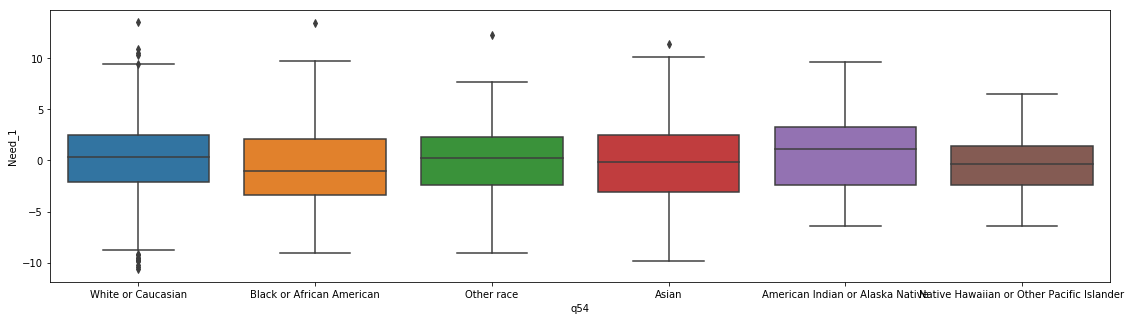

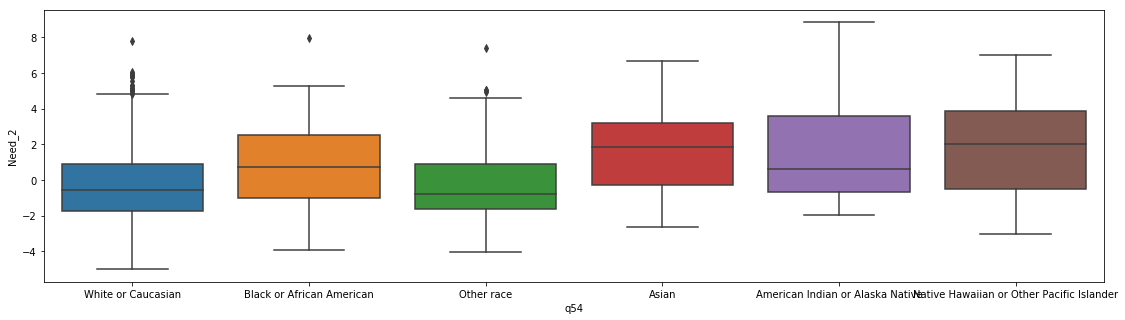

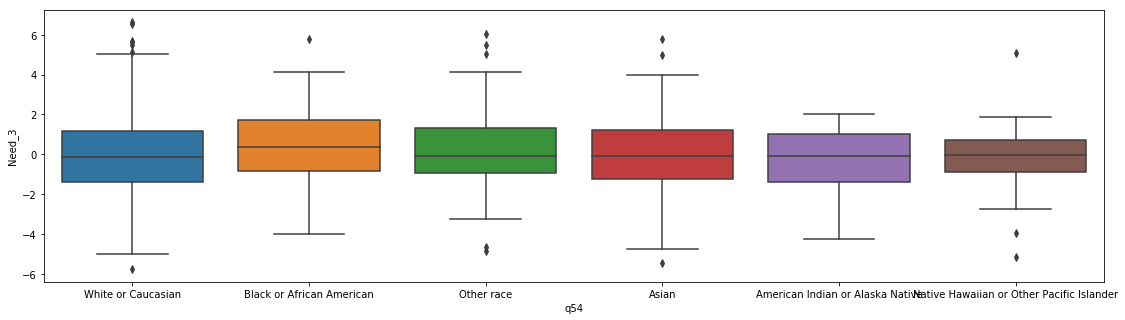

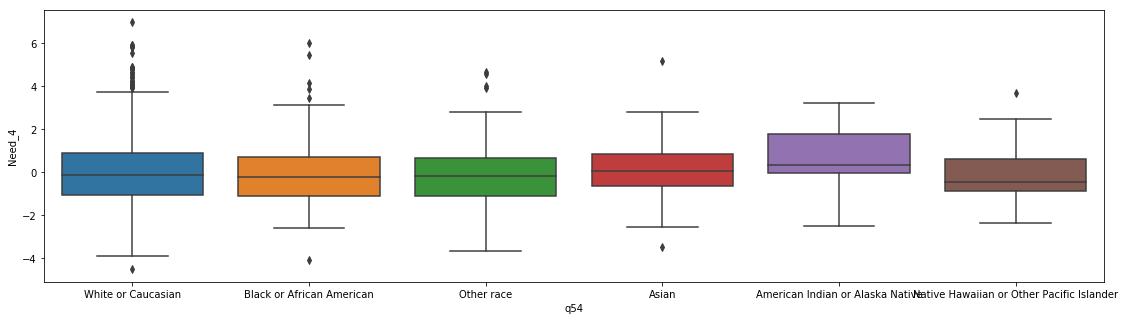

In [14]:
# According to Race

fig, ax = plt.subplots(figsize = (19, 5))
sns.boxplot(x = 'q54',
            y =  'Need_1',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (19, 5))
sns.boxplot(x = 'q54',
            y =  'Need_2',
            data = final_pca_df)

fig, ax = plt.subplots(figsize = (19, 5))
sns.boxplot(x = 'q54',
            y =  'Need_3',
            data = final_pca_df)


fig, ax = plt.subplots(figsize = (19, 5))
sns.boxplot(x = 'q54',
            y =  'Need_4',
            data = final_pca_df)

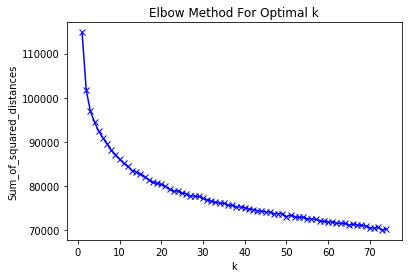

In [23]:
# DOING CLUSTER ANALYSIS
from sklearn.cluster import KMeans # k-means clustering

#  Experiment with different numbers of clusters

Sum_of_squared_distances = []
K = range(1,75)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled_reduced)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
### After looking at the Inertia, I decided to use 5 Clusters

survey_k = KMeans(n_clusters = 5,
                      random_state = 508)


survey_k.fit(X_scaled_reduced)


survey_kmeans_clusters = pd.DataFrame({'cluster': survey_k.labels_})


print(survey_kmeans_clusters.iloc[: , 0].value_counts())

4    522
2    362
3    273
1    201
0    194
Name: cluster, dtype: int64


In [17]:
# Analyze cluster memberships

X_scaled_reduced_df = pd.DataFrame(X_scaled_reduced)


X_scaled_reduced_df.columns = final_exam_reduced.columns


clusters_df = pd.concat([survey_kmeans_clusters,
                         X_scaled_reduced_df],
                         axis = 1)

print(clusters_df)

      cluster      q2r1      q2r2      q2r3      q2r4      q2r5      q2r6  \
0           3 -1.006464  1.774749  1.321704 -0.501610 -0.242205 -0.311159   
1           4 -1.006464 -0.563460  1.321704 -0.501610 -0.242205 -0.311159   
2           4 -1.006464  1.774749  1.321704 -0.501610 -0.242205 -0.311159   
3           0 -1.006464 -0.563460 -0.756599 -0.501610  4.128742 -0.311159   
4           4 -1.006464 -0.563460 -0.756599  1.993579 -0.242205 -0.311159   
5           3 -1.006464 -0.563460  1.321704 -0.501610 -0.242205 -0.311159   
6           2 -1.006464 -0.563460  1.321704 -0.501610 -0.242205 -0.311159   
7           2 -1.006464 -0.563460  1.321704  1.993579 -0.242205 -0.311159   
8           4  0.993577 -0.563460 -0.756599 -0.501610 -0.242205 -0.311159   
9           2 -1.006464 -0.563460  1.321704 -0.501610 -0.242205 -0.311159   
10          4  0.993577 -0.563460 -0.756599 -0.501610 -0.242205 -0.311159   
11          4  0.993577 -0.563460 -0.756599 -0.501610 -0.242205 -0.311159   

In [18]:
# Reattach Demographic Information

final_clusters_df = pd.concat([final_exam.iloc[ : , 1:2], final_exam.iloc[ : , -11:] , clusters_df], axis = 1)

print(final_clusters_df)

      q1  q48  q49  q50r1  q50r2  q50r3  q50r4  q50r5  q54  q55  ...  \
0      5    3    1      0      0      0      1      0    1    2  ...   
1      3    3    2      1      0      0      0      0    2    2  ...   
2      2    1    2      1      0      0      0      0    1    2  ...   
3      2    4    2      1      0      0      0      0    2    2  ...   
4      4    3    1      0      1      0      0      0    1    2  ...   
5      7    3    4      0      0      0      0      1    1    2  ...   
6      3    4    2      1      0      0      0      0    1    2  ...   
7      5    4    1      0      1      1      0      0    1    2  ...   
8      3    4    2      1      0      0      0      0    1    2  ...   
9      6    2    2      1      0      0      0      0    1    2  ...   
10     4    3    2      0      0      1      1      1    1    2  ...   
11     6    6    1      0      0      1      0      0    1    2  ...   
12     2    3    2      1      0      0      0      0    1    2 

In [19]:
# COMBINING PRINCIPAL COMPONENT ANALYSIS & CLUSTERING

print(X_pca_df.head(n = 5))

print(pd.np.var(X_pca_df))


# Scale to get equal variance
scaler = StandardScaler()


scaler.fit(X_pca_df)


X_pca_clust = scaler.transform(X_pca_df)


X_pca_clust_df = pd.DataFrame(X_pca_clust)


print(pd.np.var(X_pca_clust_df))


X_pca_clust_df.columns = X_pca_df.columns

survey_k.fit(X_pca_clust_df)

     Need_1    Need_2    Need_3    Need_4
0  2.623968  1.036448  1.957540  1.538365
1  2.169958 -1.312622  2.383347 -1.505702
2  1.713962 -2.131645  0.506367 -2.470104
3 -4.773745  1.819748  1.625943  0.164086
4  1.392211  0.747005  0.101616 -0.894177
Need_1    13.233741
Need_2     4.910237
Need_3     3.514861
Need_4     2.385682
dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=508, tol=0.0001, verbose=0)

In [20]:
survey_k.fit(X_pca_clust_df)


survey_kmeans_clusters = pd.DataFrame({'cluster': survey_k.labels_})


print(survey_kmeans_clusters.iloc[: , 0].value_counts())


centroids_pca = survey_k.cluster_centers_


centroids_pca_df = pd.DataFrame(centroids_pca)

centroids_pca_df.columns = ['Need_1', 'Need_2', 'Need_3','Need_4']


print(centroids_pca_df)

centroids_pca_df.to_excel('FINAL_PCA_CENTROIDS.xlsx')

3    438
1    343
4    330
0    241
2    200
Name: cluster, dtype: int64
     Need_1    Need_2    Need_3    Need_4
0 -1.086612  1.369844 -0.417851  0.190890
1 -0.521735 -0.438201  1.043526 -0.359001
2  0.835938  0.108523  0.382936  1.622071
3 -0.053690 -0.771536 -0.808361  0.056235
4  0.900477  0.413329  0.061357 -0.823977


In [21]:
# Converted to dataframe to develop box boxplots between clusters and needs 
clst_pca_df = pd.concat([survey_kmeans_clusters,
                         X_pca_clust_df],
                         axis = 1)


print(clst_pca_df)

### merging categorical variables with pca variables ###

final_pca_clust_df = pd.concat([final_exam.iloc[ : , 1:2], final_exam.iloc[ : , -11:] , clst_pca_df], axis = 1)



print(final_pca_clust_df.head(n = 5))

      cluster    Need_1    Need_2    Need_3    Need_4
0           2  0.721302  0.467731  1.044135  0.995986
1           1  0.596500 -0.592364  1.271257 -0.974839
2           4  0.471151 -0.961975  0.270092 -1.599223
3           0 -1.312254  0.821221  0.867264  0.106234
4           4  0.382705  0.337110  0.054201 -0.578918
5           4  1.606859  0.884599  0.068992 -0.960470
6           1 -0.540290 -1.331004  0.408671 -0.984852
7           1  0.046681 -0.585814  1.206570 -1.509139
8           3  0.924975 -0.178990 -1.857185 -0.831498
9           1 -1.492947 -0.581305 -0.121042 -0.776789
10          1  0.000726 -0.570791  0.127097 -0.556860
11          3 -0.222577 -0.162928 -0.871116 -0.634122
12          1 -0.949482 -0.731847  0.919865 -0.733623
13          1 -0.097359 -0.638404  1.822288  0.477024
14          4  1.477346  1.470211  1.214902 -0.265061
15          1  0.299006  0.568701  1.845630  0.200820
16          1  0.115929 -0.510043  1.074001 -1.314243
17          4  1.180102 -0.3

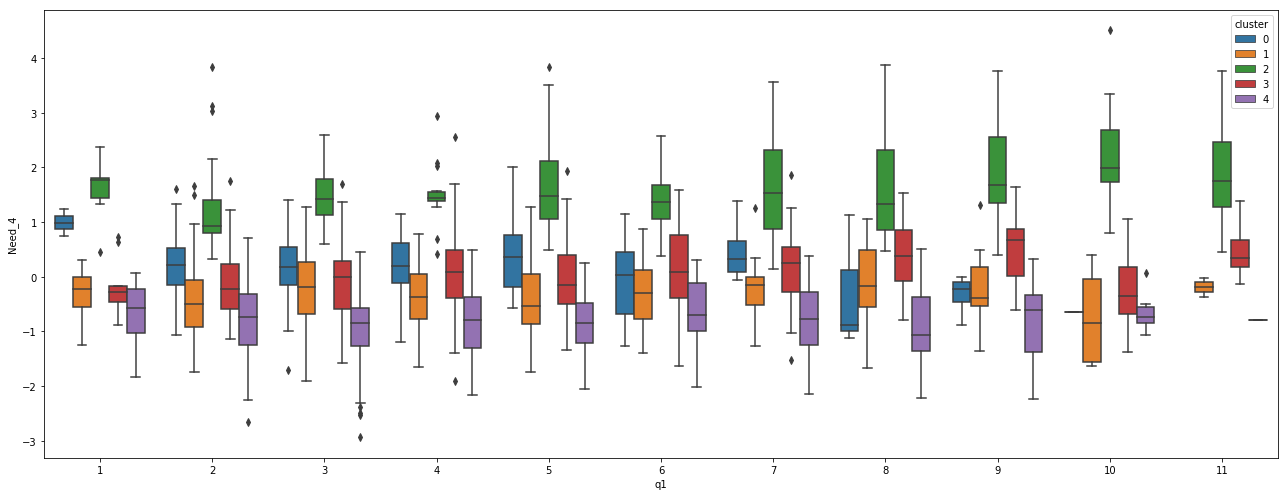

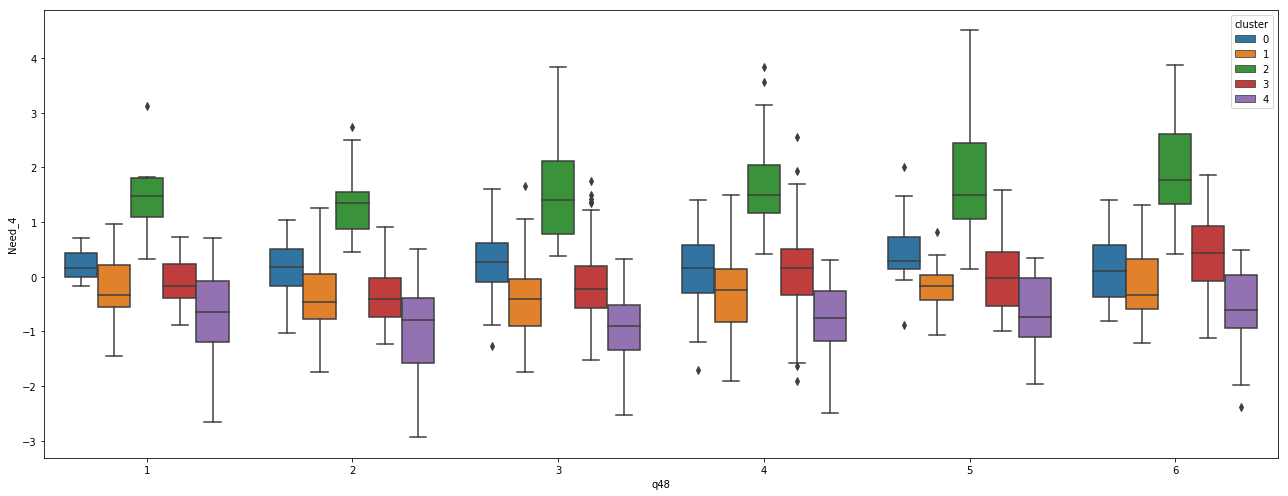

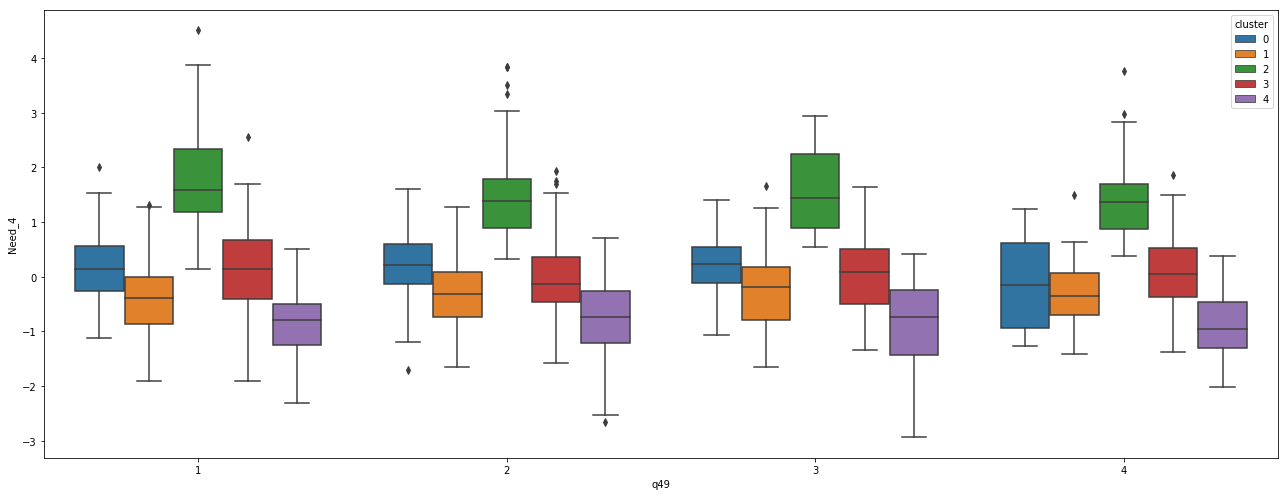

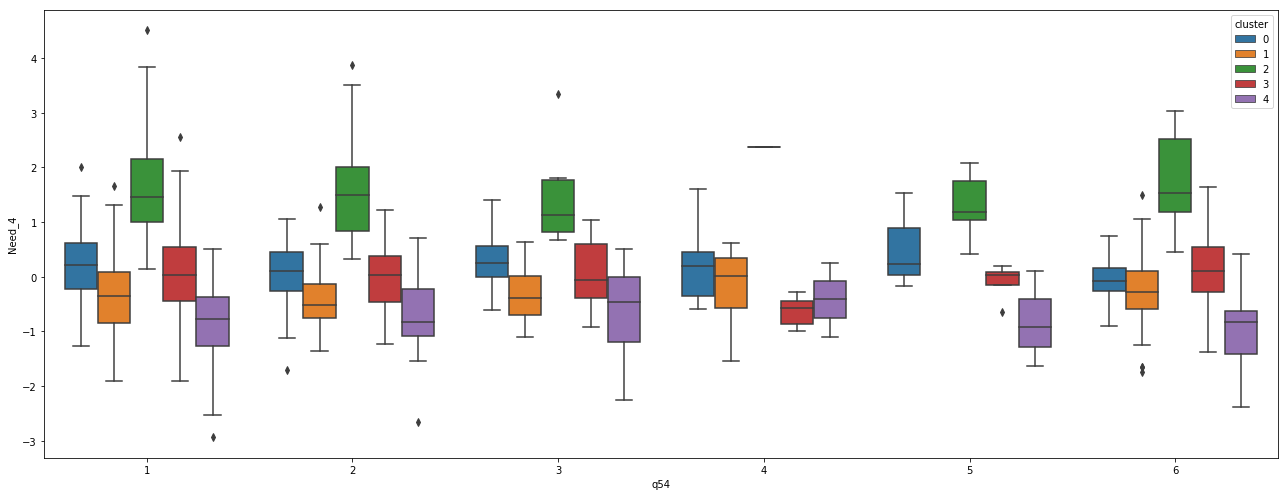

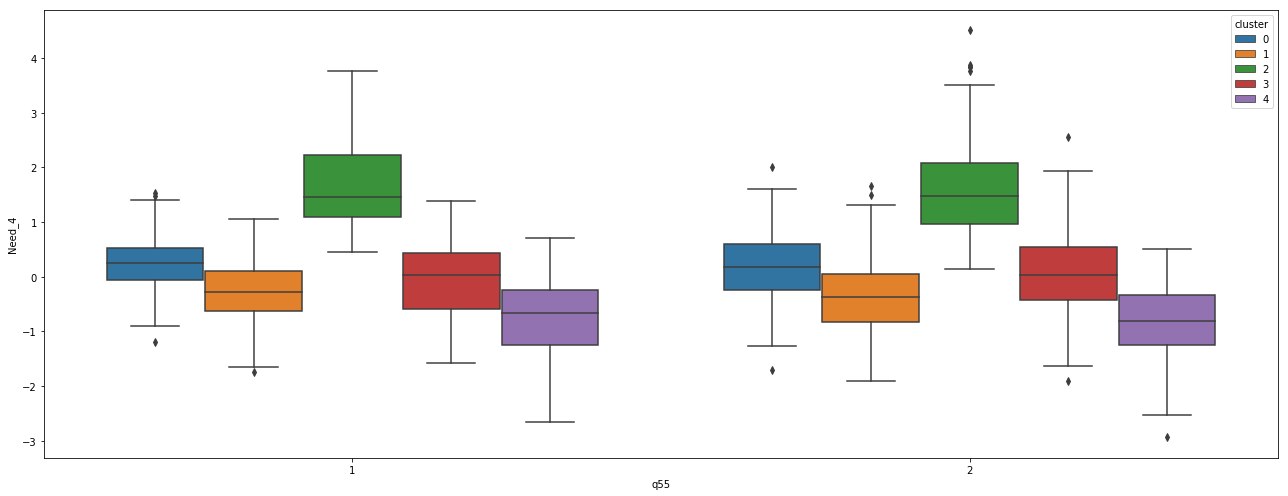

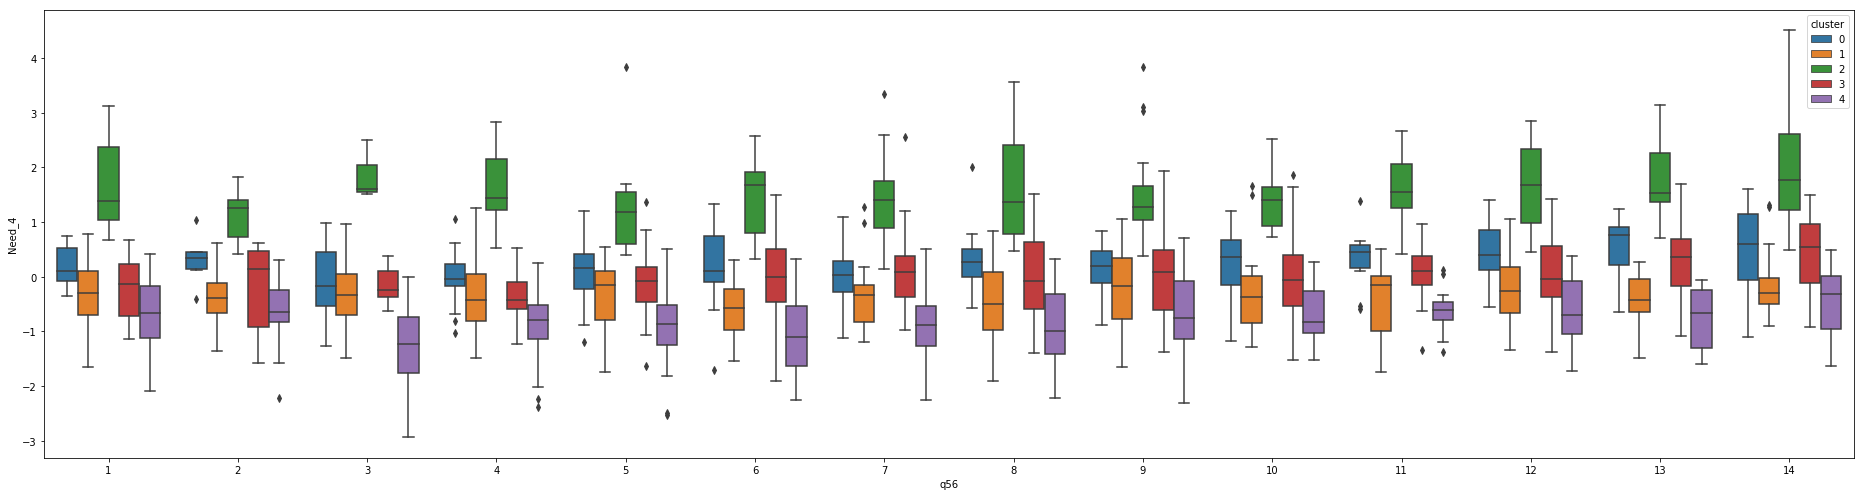

In [22]:
# PLOTTING COMBINED BOXPLOTS

"""
AFTER DOING A THOROUGH ANALYSIS ON ALL 4 PRINCIPAL COMPONENTS, I DECIDED TO FOCUS ON THE LAST COMPONENT TITLED
AS NEED_4. AFTER DOING MY PCA, I CLEARLY IDENTIFIED A PATTERN AND RELATION WHICH I AM GOING TO ELABORATE AND FOCUS
IN MY WRITE-UP. 
AFTER THIS DECISION I VISUALIZED MY COMBINED (CLUSTER & PCA) PLOTS IN ORDER TO IDENTIFY THE BEST CLUSTER TO TARGET.
"""

fig, ax = plt.subplots(figsize = (18, 7))
sns.boxplot(x = 'q1',
            y = 'Need_4',
            hue = 'cluster',
            data = final_pca_clust_df)


#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()


####

fig, ax = plt.subplots(figsize = (18, 7))
sns.boxplot(x = 'q48',
            y = 'Need_4',
            hue = 'cluster',
            data = final_pca_clust_df)


#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()



###

fig, ax = plt.subplots(figsize = (18, 7))
sns.boxplot(x = 'q49',
            y = 'Need_4',
            hue = 'cluster',
            data = final_pca_clust_df)


#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()


###

fig, ax = plt.subplots(figsize = (18, 7))
sns.boxplot(x = 'q54',
            y = 'Need_4',
            hue = 'cluster',
            data = final_pca_clust_df)

#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()


###

fig, ax = plt.subplots(figsize = (18, 7))
sns.boxplot(x = 'q55',
            y = 'Need_4',
            hue = 'cluster',
            data = final_pca_clust_df)


#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()


###
fig, ax = plt.subplots(figsize = (26, 7))
sns.boxplot(x = 'q56',
            y = 'Need_4',
            hue = 'cluster',
            data = final_pca_clust_df)


#plt.ylim(-5, 3)
plt.tight_layout()
plt.show()



In [ ]:
"""
IT TURNED OUT THAT CLUSTER 2 (GREEN), IS A PERFECT FIT 
FOR THE CHOSEN PRINCIPAL COMPONENT.
AFTER HAVING MY IDEAL CLUSTER FOR THE CHOSEN PRINCIPAL COMPONENT, I WILL DO MY RECOMMENDATION IN MY WRITE-UP 
ACCORDINGLY.
"""